In [5]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=262.871, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=235.197, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=259.921, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=236.090, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=233.777, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=233.728, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.412 seconds
RMSE: 275064.70342835505
R-squared: -4.782631632658318


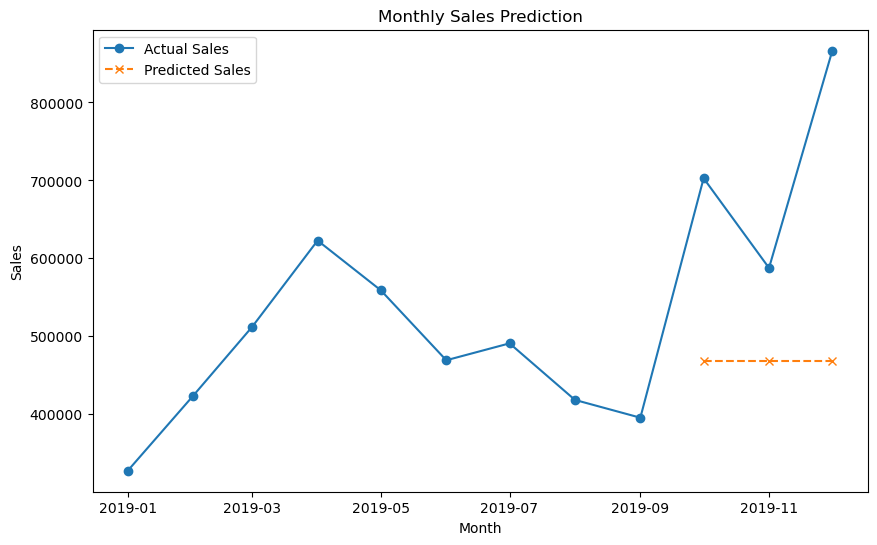

Predicted Values:
2019-10-01    468800.008889
2019-11-01    468800.008889
2019-12-01    468800.008889
Freq: MS, dtype: float64


In [29]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ensure 'Order Date' is in datetime format with correct dayfirst parameter
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y %H:%M', errors='coerce', dayfirst=True)

# Extract the year and create a new column 'Year'
data['Year'] = data['Order Date'].dt.year

# Filter for the specific product category and year
monitors_2019 = data[(data['Product Category'] == 'Monitors') & (data['Year'] == 2019)]

# Extract month and aggregate sales
monitors_2019.loc[:, 'Month'] = monitors_2019['Order Date'].dt.month
monthly_sales = monitors_2019.groupby('Month')['Sales'].sum().sort_index()

# Set month as the index
monthly_sales.index = pd.date_range(start="2019-01-01", periods=len(monthly_sales), freq='MS')

# Split the data into training and testing sets
train_data = monthly_sales.iloc[:int(0.8 * len(monthly_sales))]
test_data = monthly_sales.iloc[int(0.8 * len(monthly_sales)):]

# Fit a non-seasonal ARIMA model
arima_model = auto_arima(
    train_data,
    seasonal=False,  # Set to False for non-seasonal modeling
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

# Predict on the test set
test_predictions = arima_model.predict(n_periods=len(test_data))

# Evaluate the model's performance
rmse = np.sqrt(mean_squared_error(test_data, test_predictions))
r2 = r2_score(test_data, test_predictions)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# Plot actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Actual Sales', marker='o')
plt.plot(test_data.index, test_predictions, label='Predicted Sales', linestyle='--', marker='x')
plt.title('Monthly Sales Prediction')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

print("Predicted Values:")
print(test_predictions)